In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

CURRENT_DIR = os.getcwd()

In [62]:
filenames = os.listdir(f"{CURRENT_DIR}/eval_results")
df_array = []
for filename in filenames:
    filepath = f"{CURRENT_DIR}/eval_results/{filename}"
    with open(filepath, "rb") as f:
        data_stored = pickle.load(f)
    ds = pd.DataFrame.from_dict(data_stored)
    ds["filename"] = filename
    df_array.append(ds)

ds = pd.concat(df_array)

In [63]:
ds["model_name"].unique()

array(['RL', '(-10,0,0)', '(-10,0,0.5)', '(-10,0,1)', '(-10,0.5,0)',
       '(-10,0.5,0.5)', '(-10,0.5,1)', '(-10,1,0)', '(-10,1,0.5)',
       '(-10,1,1)', '(-5,0,0)', '(-5,0,0.5)', '(-5,0,1)', '(-5,0.5,0)',
       '(-5,0.5,0.5)', '(-5,0.5,1)', '(-5,1,0)', '(-5,1,0.5)', '(-5,1,1)',
       '(0,0,0)', '(0,0,0.5)', '(0,0,1)', '(0,0.5,0)', '(0,0.5,0.5)',
       '(0,0.5,1)', '(0,1,0)', '(0,1,0.5)', '(0,1,1)', '(5,0,0)',
       '(5,0,0.5)', '(5,0,1)', '(5,0.5,0)', '(5,0.5,0.5)', '(5,0.5,1)',
       '(5,1,0)', '(5,1,0.5)', '(5,1,1)', '(10,0,0)', '(10,0,0.5)',
       '(10,0,1)', '(10,0.5,0)', '(10,0.5,0.5)', '(10,0.5,1)', '(10,1,0)',
       '(10,1,0.5)', '(10,1,1)', '(0.5,0,0)', '(0.5,0,0.5)', '(0.5,0,1)',
       '(0.5,0.5,0)', '(0.5,0.5,0.5)', '(0.5,0.5,1)', '(0.5,1,0)',
       '(0.5,1,0.5)', '(0.5,1,1)', '(1,0,0)', '(1,0,0.5)', '(1,0,1)',
       '(1,0.5,0)', '(1,0.5,0.5)', '(1,0.5,1)', '(1,1,0)', '(1,1,0.5)',
       '(1,1,1)', '(2.5,0,0)', '(2.5,0,0.5)', '(2.5,0,1)', '(2.5,0.5,0)',
       '(

In [64]:
# d1 = (5, 0.5, 0)
# d2 = (0, 0.5, 0)
# filt1 = ds["model_name"] == f"({d1[0]},{d1[1]},{d1[2]})"
# ds1 = ds[filt1]
# filt2 = ds["model_name"] == f"({d2[0]},{d2[1]},{d2[2]})"
# ds2 = ds[filt2]


In [65]:
def plot_comparison(ds, d1, d2, d3):
    name1 = f"({d1[0]},{d1[1]},{d1[2]})"
    name2 = f"({d2[0]},{d2[1]},{d2[2]})"
    name3 = f"({d3[0]},{d3[1]},{d3[2]})"
    title1 = f"Model with F={d1[0]}, CR={d1[1]}, MG={d1[2]}"
    title2 = f"Model with F={d2[0]}, CR={d2[1]}, MG={d2[2]}"
    title3 = f"Model with F={d3[0]}, CR={d3[1]}, MG={d3[2]}"
    filt1 = ds["model_name"] == name1
    ds1 = ds[filt1]
    filt2 = ds["model_name"] == name2
    ds2 = ds[filt2]
    filt3 = ds["model_name"] == name3
    ds3 = ds[filt3]

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 7), sharex=True, sharey=True)

    global_solution_history_1 = ds1["global_solution_history"].values[0]
    fitness_trial_history_1 = ds1["fitness_trial_history"].values[0]
    ax1.plot(global_solution_history_1)
    ax1.plot(fitness_trial_history_1)
    ax1.set_ylabel("Solution")
    ax1.set_title(title1)

    global_solution_history_2 = ds2["global_solution_history"].values[0]
    fitness_trial_history_2 = ds2["fitness_trial_history"].values[0]
    ax2.plot(global_solution_history_2)
    ax2.plot(fitness_trial_history_2)
    ax2.set_title(title2)
    ax2.set_ylabel("Solution")

    global_solution_history_3 = ds3["global_solution_history"].values[0]
    fitness_trial_history_3 = ds3["fitness_trial_history"].values[0]
    ax3.plot(global_solution_history_3)
    ax3.plot(fitness_trial_history_3)
    ax3.set_title(title3)
    ax3.set_xlabel("Iteration")
    ax3.set_ylabel("Solution")
    plt.tight_layout()
    plt.show()

    return fig

def plot_comparison_multi(ds, *args):
    names = []
    titles  = []
    ds_array = []
    for d in args:
        name = f"({d[0]},{d[1]},{d[2]})"
        names.append(name)
        title = f"Model with F={d[0]}, CR={d[1]}, MG={d[2]}"
        titles.append(title)
        filt = ds["model_name"] == name
        ds_array.append(ds[filt])

    fig, axs = plt.subplots(len(ds_array), 1, figsize=(12, 7), sharex=True, sharey=True)

    for i, ds in enumerate(ds_array):
        global_solution_history = ds["global_solution_history"].values[0]
        fitness_trial_history = ds["fitness_trial_history"].values[0]
        axs[i].plot(global_solution_history)
        axs[i].plot(fitness_trial_history)
        axs[i].set_title(titles[i])
        axs[i].set_ylabel("Solution")

    axs[-1].set_xlabel("Iteration")
    plt.tight_layout()
    plt.show()

    return fig

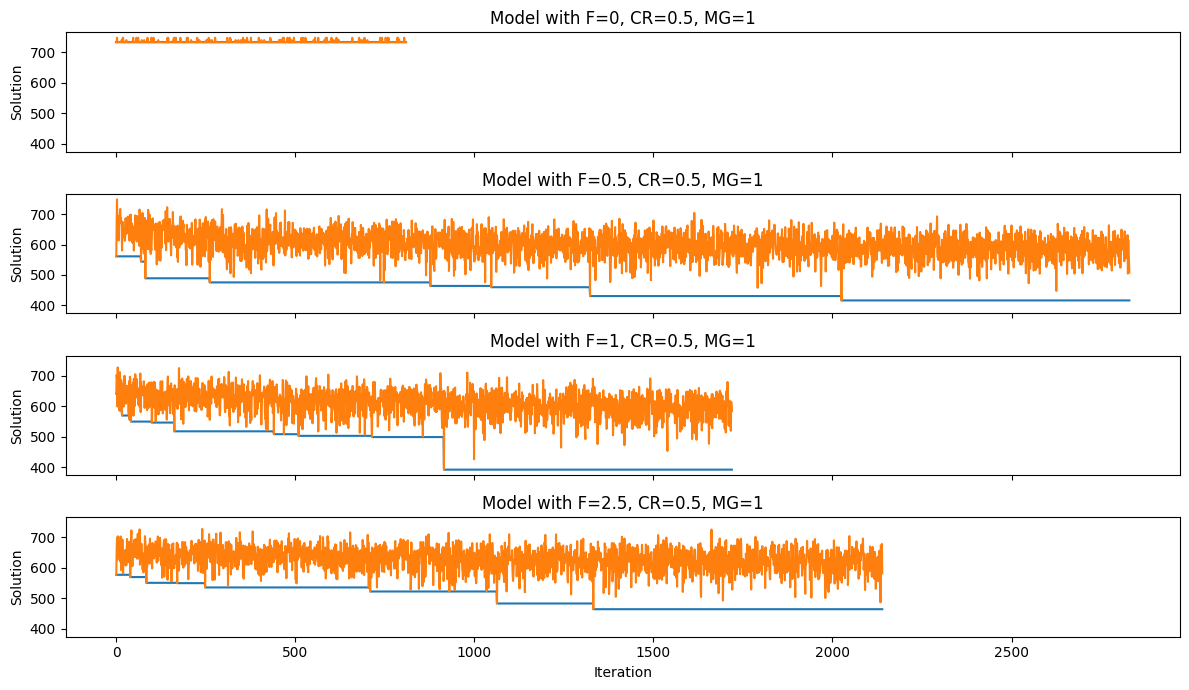

In [84]:
d1 = (0, 0.5, 1)
d2 = (0.5, 0.5, 1)
d3 = (1, 0.5, 1)
d4 = (2.5, 0.5, 1)
_ = plot_comparison_multi(ds, d1, d2, d3, d4)

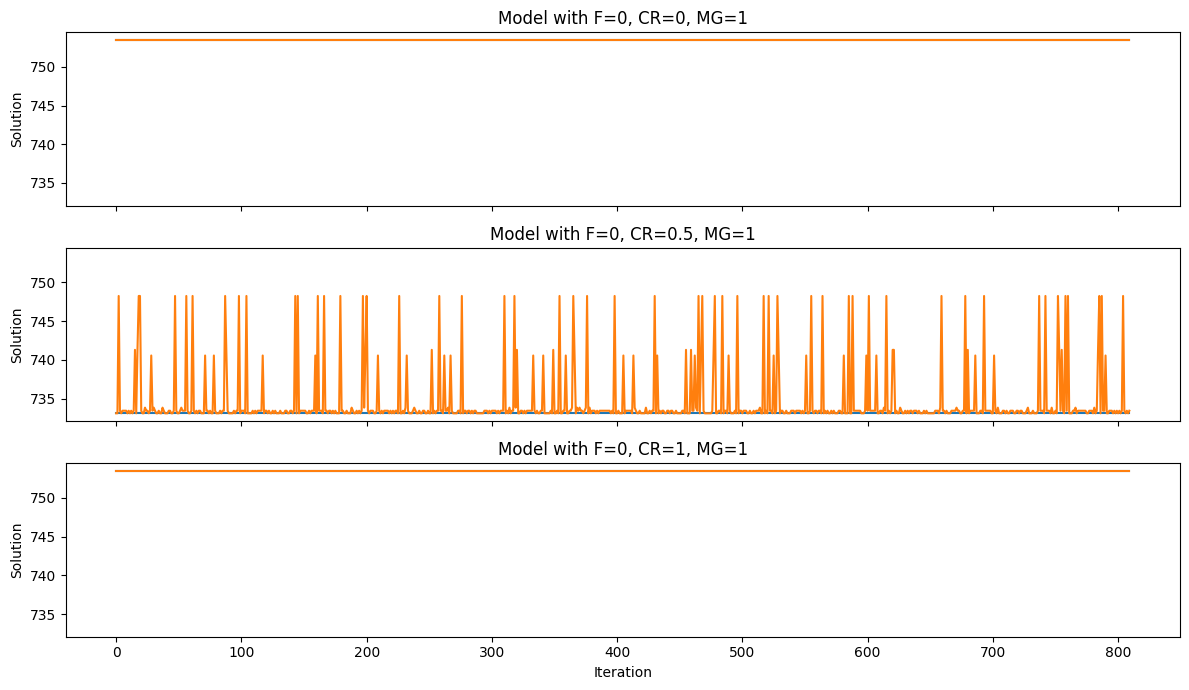

In [85]:
d1 = (0, 0, 1)
d2 = (0, 0.5, 1)
d3 = (0, 1, 1)
_ = plot_comparison_multi(ds, d1, d2, d3)

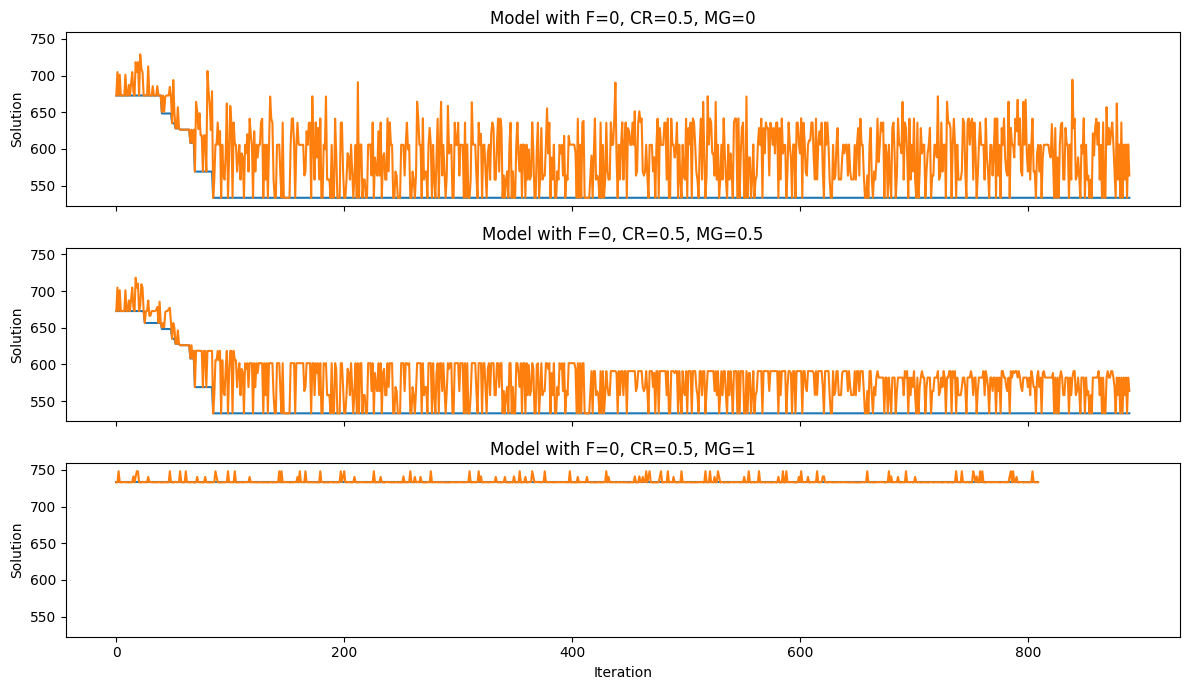

In [86]:
d1 = (0, 0.5, 0)
d2 = (0, 0.5, 0.5)
d3 = (0, 0.5, 1)
_ = plot_comparison_multi(ds, d1, d2, d3)